In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
air_data = pd.read_csv(r"C:\Users\Lenovo\Documents\Assignments\EastWestAirlines.csv")

In [4]:
air_data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
from sklearn import preprocessing
air_data_np = air_data.values

In [6]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(air_data_np)
air_data_scaled = pd.DataFrame(x_scaled,columns=air_data.columns)

In [8]:
air_data_scaled.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [9]:
from scipy.cluster import hierarchy as sch

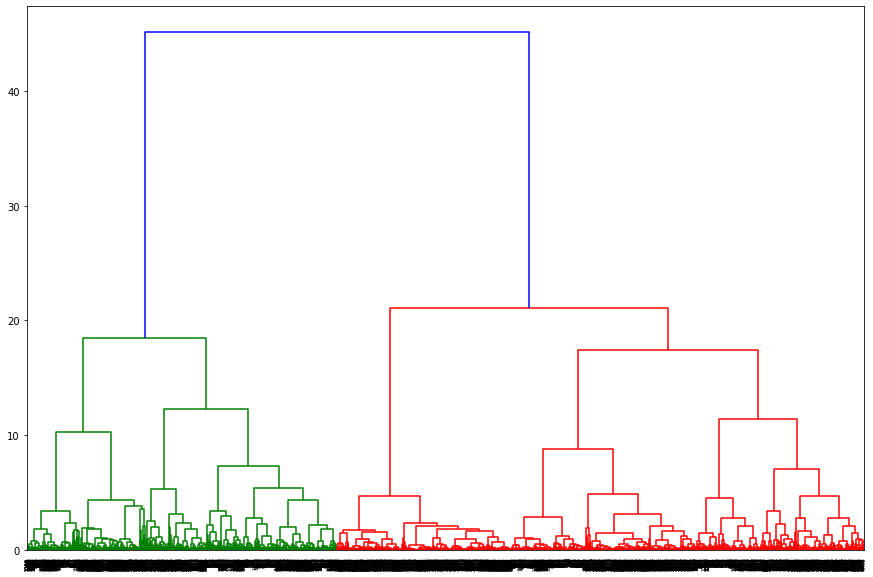

In [16]:
#Plotting Dendrogram using Ward's method
plt.figure(figsize=(15, 10))  
dendrogram = sch.dendrogram(sch.linkage(air_data_scaled,method='ward'))

In [17]:
from sklearn.cluster import KMeans

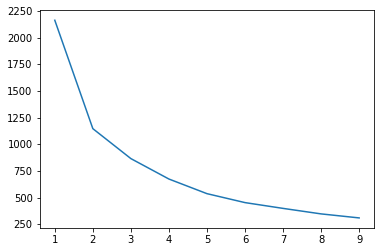

In [18]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(air_data_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)

In [19]:
#Appling KMeans with K=4
kmeans = KMeans(4)
kfit = kmeans.fit(air_data_scaled)
identified_clusters = kfit.predict(air_data_scaled)

In [20]:
clustered_data = air_data.copy()
clustered_data['Cluster'] = identified_clusters

In [21]:
#Storing values of each clusters in a different dataframe
cluster_1 = clustered_data[(clustered_data['Cluster'])==0]
cluster_2 = clustered_data[(clustered_data['Cluster'])==1]
cluster_3 = clustered_data[(clustered_data['Cluster'])==2]
cluster_4 = clustered_data[(clustered_data['Cluster'])==3]

In [22]:
cluster_1.sample(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
2804,2826,60856,0,2,1,1,17332,8,0,0,2076,0,0
3358,3381,24580,0,1,1,1,255,3,0,0,1926,0,0
2207,2224,12221,0,1,1,1,511,4,0,0,3692,0,0
3233,3255,33530,0,1,1,1,0,0,0,0,1777,0,0
2580,2599,42366,0,2,1,1,6293,9,0,0,2770,0,0


In [23]:
cluster_2.sample(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
617,626,146599,0,3,1,1,16463,16,1000,2,6444,1,1
121,124,205126,0,5,1,1,126630,45,2250,10,7668,1,1
546,552,153962,0,5,1,1,90992,21,0,0,6567,1,1
1663,1679,11789,0,4,1,1,28756,20,900,2,4775,1,1
129,132,142175,0,4,1,1,37461,22,0,0,6732,1,1


In [24]:
cluster_3.sample(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
857,868,58620,0,1,1,1,2125,10,0,0,6051,0,2
165,168,69882,0,1,1,1,180,6,0,0,7582,0,2
1179,1191,34450,0,1,1,1,26996,7,0,0,5566,0,2
5,6,16420,0,1,1,1,0,0,0,0,6942,0,2
66,67,9375,0,1,1,1,1750,7,0,0,6826,0,2


In [25]:
cluster_4.sample(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
2187,2204,50230,0,1,1,1,4149,9,800,4,3727,1,3
925,936,10084,0,1,1,1,500,1,500,1,5946,1,3
2714,2736,32824,0,1,1,1,1660,5,100,1,2339,1,3
536,542,17445,0,1,1,1,4500,3,500,1,6576,1,3
490,496,2701,0,1,1,1,5000,10,0,0,8002,1,3


In [27]:
display(cluster_1[(cluster_1['Award?'])==0])
display(cluster_2[(cluster_2['Award?'])==1])
display(cluster_3[(cluster_3['Award?'])==1])
display(cluster_4[(cluster_4['Award?'])==0])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
1129,1141,1625,0,1,1,1,1375,4,0,0,1547,0,0
1928,1945,3082,0,1,1,1,0,0,0,0,3923,0,0
1933,1950,11355,0,1,1,1,135,3,0,0,3916,0,0
1935,1952,50586,0,1,1,1,0,0,0,0,3902,0,0
1945,1962,32160,0,1,1,1,1130,6,250,1,3883,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,0
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,0
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,1
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3855,3878,190730,0,5,1,1,78916,28,2450,9,1648,1,1
3881,3904,32424,0,4,1,1,39635,16,0,0,1584,1,1
3883,3906,126167,0,5,1,1,190160,15,0,0,1612,1,1
3908,3931,57642,0,4,1,1,52176,15,0,0,1564,1,1


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster


In [28]:
cluster_1.sort_values(by="cc1_miles").tail(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
2638,2658,137760,0,5,1,1,64949,13,0,0,2580,0,0
2693,2713,102942,0,5,1,1,56780,18,0,0,2405,0,0
2934,2956,131635,0,5,1,1,60315,9,0,0,2756,0,0
2882,2904,153664,0,5,1,1,55567,17,0,0,1881,0,0
3315,3338,298927,0,5,1,1,69449,27,150,3,2047,0,0


In [29]:
cluster_2.sort_values(by="cc1_miles").tail(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
1899,1916,67358,0,5,1,1,67027,34,500,1,4379,1,1
624,633,365918,0,5,1,1,83752,23,1373,7,6429,1,1
1917,1934,82981,0,5,1,3,105325,44,1000,2,3964,1,1
1930,1947,145868,0,5,1,1,61068,18,10042,4,3925,1,1
1974,1991,134346,0,5,1,1,100210,18,0,0,4485,1,1


In [30]:
cluster_3.sort_values(by="cc1_miles").tail(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
255,259,236274,0,5,1,1,61515,12,0,0,7375,0,2
243,247,118934,0,5,1,1,66222,37,2250,17,7354,0,2
2252,2270,235312,0,5,1,1,56685,16,0,0,3476,0,2
347,352,197328,0,5,1,1,60447,12,0,0,7092,0,2
2543,2562,128927,0,5,1,1,61165,14,0,0,2882,0,2


In [32]:
cluster_4.sort_values(by="cc1_miles").tail(5)
#After seeing cc1_miles, we see that, in MAX cc1_miles is 2 or 3 which is to say they have earned less miles from freq flier credit card than the other two clusters, as have MAX cc1_miles as 5.

#But clusters (4,2) have compliment 'Award' and clusters (1 , 3) have compliment 'Award', so there must be another factor which seperates these two

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
2993,3015,47966,2947,3,1,1,51615,11,650,3,3145,1,3
2995,3017,15279,0,3,1,1,17984,19,300,1,3139,1,3
3011,3033,63193,0,3,1,1,20372,14,100,1,3036,1,3
2281,2299,89761,0,3,1,1,11965,13,0,0,3845,1,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,3


In [33]:
cluster_1.sort_values(by="Flight_trans_12").tail(5)


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
3911,3934,55922,2273,1,1,1,8104,19,4104,16,1552,0,0
2284,2302,35203,0,1,1,1,1800,16,1800,16,3832,0,0
3096,3118,175501,1000,3,1,1,34318,36,7974,19,2691,0,0
2179,2196,161579,0,1,1,1,7688,21,5688,20,3811,0,0
2903,2925,2900,0,1,1,1,2900,29,2900,29,1804,0,0


In [34]:
cluster_2.sort_values(by="Flight_trans_12").tail(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
531,537,98472,1776,5,1,1,124421,45,10250,28,6621,1,1
65,66,53914,0,3,1,1,33767,45,5550,29,6826,1,1
2709,2731,405499,1000,4,1,1,72318,46,9729,29,2329,1,1
2015,2032,53232,888,4,1,1,80696,65,22100,45,3831,1,1
3594,3617,27619,0,4,1,1,83726,68,14050,46,1325,1,1


In [35]:
cluster_3.sort_values(by="Flight_trans_12").tail(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
243,247,118934,0,5,1,1,66222,37,2250,17,7354,0,2
1014,1025,96827,1094,1,1,1,12100,19,8100,17,5801,0,2
1236,1249,146086,0,1,1,1,6950,17,6950,17,5345,0,2
976,987,20498,0,1,1,1,7826,20,7226,18,5491,0,2
2058,2075,42342,0,1,1,1,11408,23,11408,23,4331,0,2


In [36]:
cluster_4.sort_values(by="Flight_trans_12").tail(5)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Cluster
1529,1544,57857,1099,1,1,1,62650,37,12400,29,4996,1,3
2789,2811,126680,0,1,1,1,18248,39,4723,31,2108,1,3
1676,1692,51304,1362,1,1,1,11611,40,10075,36,4708,1,3
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,3
3235,3257,287033,0,1,1,1,26161,58,12873,53,2272,1,3


In [ ]:
After seeing Flight_trans_12 i.e. Flight transaction done in past 12 months, they are particularly high where Award is 1 rather than 0
Finally we can deduce that


-> People in Cluster 1 have flown frequently in the past 12 months and have earned more miles by using Frequent Flier Credit Cards


-> People in Cluster 2 have not flown frequently in the past 12 months and they have not earned much miles by using Frequent Flier Credit Cards


-> People in Cluster 3 have not flown frequently in the past 12 months but they have earned more miles by using Frequent Flier Credit Cards


-> People in Cluster 4 have flown frequently in the past 12 months but they have not earned much miles by using Frequent Flier Credit Cards
So we can say that there are 4 kinds of people, where whereas the other , among these 2, while the

--------------------------------------------------------------------------------------------------------------------------------------------------------



We can advertize Cluster 1 with better rewards as they travel frequently and use credit cards actively, this will enncourage them to keep using the services
We can advertize Cluster 2 with Loyalty Programs and introduce them to different credit at card schemes so that they start travelling with the airline more frequently
We can advertize Cluster 3 with Loyalty Programs so that they start travelling with the airline more, they already earn more miles by using Frequent Flier Credit Cards and hence we can introduce them towards discounts and benefits of travelling with the airline more frequently
We can advertize Cluster 4 with different Credit Card Schemes associated with different services which can be availed on daily basis

In [37]:
from sklearn.cluster import AgglomerativeClustering

In [38]:
agg_clus_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg_clus_model.fit(air_data_scaled)
labels = agg_clus_model.labels_


In [39]:
agg_clus_data = air_data.copy()

In [40]:
agg_clus_data['Clusters'] = labels

In [41]:
agg_clus_data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,3
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [42]:
#Storing values of each clusters in a different dataframe
agg_cluster_1 = agg_clus_data[(agg_clus_data['Clusters'])==0]
agg_cluster_2 = agg_clus_data[(agg_clus_data['Clusters'])==1]
agg_cluster_3 = agg_clus_data[(agg_clus_data['Clusters'])==2]
agg_cluster_4 = agg_clus_data[(agg_clus_data['Clusters'])==3]

In [43]:

display(agg_cluster_1.sample(15))
display(agg_cluster_2.sample(15))
display(agg_cluster_3.sample(15))
display(agg_cluster_4.sample(15))

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
149,152,24868,0,1,1,1,205,5,0,0,6689,0,0
1073,1084,68454,0,3,1,1,13667,12,0,0,5559,0,0
2739,2761,71593,0,3,1,1,22666,17,0,0,2266,0,0
2235,2253,14620,0,1,1,1,0,0,0,0,2833,0,0
1243,1256,55384,967,1,1,1,0,0,0,0,5309,0,0
1753,1769,20248,0,3,1,1,18507,37,1700,5,4488,0,0
1649,1665,12112,0,1,1,1,0,0,0,0,4882,0,0
817,827,3832,0,1,1,1,1000,1,0,0,6120,0,0
1635,1651,115197,0,3,1,1,17638,24,0,0,4820,0,0
3346,3369,116923,0,5,1,1,70403,50,0,0,1738,0,0


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
1671,1687,84305,0,5,1,1,78931,15,0,0,4734,1,1
181,184,127807,0,3,1,1,17086,16,1500,3,7537,1,1
221,225,229744,0,5,1,1,68754,35,550,2,7467,1,1
1645,1661,164178,2364,4,1,1,35314,23,1100,3,4883,1,1
1327,1340,60168,0,4,1,1,44133,16,0,0,4313,1,1
1861,1878,50909,0,3,1,1,14830,18,0,0,4135,1,1
405,411,145723,0,5,1,1,59858,16,0,0,8296,1,1
517,523,66741,2880,5,1,1,71921,30,2600,7,6638,1,1
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,1
1538,1553,26862,0,3,1,1,15510,15,0,0,4965,1,1


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
3965,3988,16063,0,1,1,1,2330,9,0,0,1447,0,2
3616,3639,12078,0,1,1,1,500,1,500,1,983,0,2
3773,3796,140544,0,1,1,1,1021,3,500,1,3342,0,2
2629,2649,102230,0,1,1,1,3406,5,500,1,2620,0,2
3074,3096,43255,0,1,1,1,2691,3,750,1,2864,0,2
3248,3271,24683,0,1,1,1,600,2,0,0,2117,0,2
3267,3290,21740,0,1,1,1,5625,11,0,0,2048,0,2
3128,3150,10839,0,1,1,1,190,1,190,1,2341,0,2
2936,2958,15138,0,1,1,1,140,3,0,0,2993,0,2
3289,3312,132871,0,1,1,1,300,3,200,2,1719,0,2


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
3105,3127,58382,0,1,1,1,11327,32,4800,23,2480,1,3
2492,2511,192246,0,1,1,1,3170,5,500,1,3083,1,3
237,241,285116,0,1,1,1,8471,18,500,1,7406,1,3
2216,2234,1300,0,1,1,1,454,11,0,0,3691,1,3
2344,2362,42107,888,1,1,1,3600,4,1000,2,3607,1,3
2919,2941,36311,0,1,1,1,100,1,100,1,1766,1,3
1600,1615,3789,0,1,1,1,181,3,0,0,4756,1,3
162,165,152945,0,1,1,1,18604,6,3604,2,7598,1,3
915,926,40189,0,1,1,1,0,0,0,0,5952,1,3
3235,3257,287033,0,1,1,1,26161,58,12873,53,2272,1,3


In [45]:
display(agg_cluster_2[(agg_cluster_2['Award?']==1)])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,1
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3954,3977,33972,0,3,1,1,21029,29,0,0,1467,1,1
3973,3996,72297,0,3,1,1,16241,16,0,0,1587,1,1
3978,4001,10071,0,2,1,1,27701,16,0,0,1421,1,1
3979,4002,57793,0,3,1,1,20959,15,1198,3,1424,1,1


In [46]:
display(agg_cluster_3[(agg_cluster_3['Award?']==0)])

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
1129,1141,1625,0,1,1,1,1375,4,0,0,1547,0,2
2041,2058,15148,0,1,1,1,15148,3,0,0,269,0,2
2058,2075,42342,0,1,1,1,11408,23,11408,23,4331,0,2
2153,2170,184301,0,1,1,1,6454,13,3954,12,4010,0,2
2179,2196,161579,0,1,1,1,7688,21,5688,20,3811,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0,2
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,2
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2


In [ ]:
Clusters did not provide clear business Insights